<a href="https://colab.research.google.com/github/mahsoosalimi/100DaysOfCV/blob/main/04_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Image Segmentation**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


(480, 720, 3)


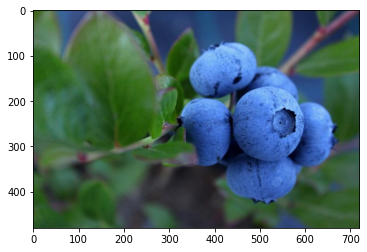

In [ ]:
# read an image
img = cv2.imread('/content/gdrive/My Drive/Images/Blueberries/Blueberry1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

original_shape = img.shape
print(img.shape)

plt.imshow(img)

In [ ]:
# converts the M*N*3 image into a K*3 matrix where K=M*N and each row is now a vector in the 3D space of RGB
vectorized = img.reshape((-1,3))
print(vectorized.shape)

(345600, 3)


In [ ]:
# convert the unit8 values to float
vectorized = np.float32(vectorized)

In [ ]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

#**K-Means Clustering**


In [86]:
K = 3
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [87]:
from sklearn.cluster import KMeans

# Flattening image into 1-d array.
all_pixels = img.reshape((-1,3))
print(all_pixels.shape)
dominant_colors = 3
km = KMeans(dominant_colors,max_iter=30)
km.fit(all_pixels)

(345600, 3)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=30,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [88]:
centers=km.cluster_centers_
print(centers)

# centers=np.array(centers,dtype='uint8')
centers = np.uint8(centers)
print(centers)

[[ 45.07631952  75.44249882  45.16933313]
 [ 84.69295085 132.59558458 214.37907352]
 [ 68.56659572  98.48732008  97.40683237]]
[[ 45  75  45]
 [ 84 132 214]
 [ 68  98  97]]


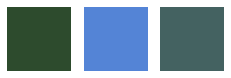

In [89]:
plt.figure(0,figsize=(8,2))

i = 1
# Storing info in color array
colors = []

for each_col in centers:
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = each_col
    plt.subplot(1, 6, i)
    plt.axis("off")
    i+=1
    plt.imshow(a)
    
plt.show()

In [90]:
res = centers[label.flatten()]
result_image = res.reshape((img.shape))

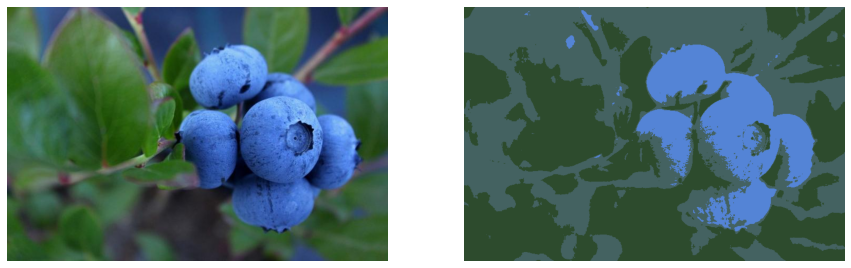

In [91]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.axis('off')
plt.xticks([]), plt.yticks([])

plt.subplot(1,2,2)
plt.imshow(result_image)
plt.axis('off')
#plt.title('Segmented Image when K = %i' % K), 
plt.xticks([]), plt.yticks([])
plt.show()